In [73]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as colors
import matplotlib.cm as cm
#matplotlib.rcParams.update({'font.size': 15})
mpl.rcParams.update({'figure.dpi': 200})
mpl.rcParams.update({'figure.figsize': (3,2)})
import pandas as pd
import seaborn as sns
from copy import deepcopy

import sys
import os
import subprocess
import glob
from collections import defaultdict
import scipy as sp
from scipy import special
from itertools import product

from scipy.io import savemat

In [80]:
data_file = "../genvariant_n-10_l-3.5_t-0.1_time-10_dt-1e-3_visc-5_seed-1_phi-0.9489_rA-0.5000_rB-0.7000_vs-1.h5"

with h5py.File(data_file, "r") as f:
    real = f["real"][0]
    data = f["data"]
    param = f["param"]
    time = data["time"][:]
    msd = data["MSD"][:]
    norm = data["Norm"][:]
    q = data["Q"][:]
    pos = data["POS"][:]
    q_as = param["Q_As"][:]
    dVs = param["dVs"][:]


In [81]:
real

1000

In [62]:
pos.shape

(6, 100, 10, 3)

In [63]:
msd/norm

array([[0.00763533, 0.01428499, 0.02067564, 0.02707235, 0.03235325,
        0.0379756 , 0.04255256, 0.04820951, 0.05295131, 0.05721848,
        0.06089628, 0.06294765, 0.06636075, 0.06876839, 0.07302056,
        0.07674741, 0.0805765 , 0.08290337, 0.08705743, 0.09247206,
        0.08883842, 0.09277004, 0.09506553, 0.09924069, 0.10869361,
        0.11321303, 0.1110544 , 0.11756412, 0.11234189, 0.1210708 ,
        0.13239561, 0.14794551, 0.16064381, 0.15635866, 0.16173521,
        0.18378349, 0.17421935, 0.15563772, 0.14518076, 0.12318172,
        0.12791674, 0.14568592, 0.17918398, 0.20447838, 0.21466109,
        0.185976  , 0.19642407, 0.30173169, 0.35727465, 0.32734268,
        0.26667203, 0.36672085, 0.35447158, 0.35894224, 0.329991  ,
        0.40891632, 0.36562403, 0.38521519, 0.34992386, 0.37462743,
        0.3476327 , 0.35995187, 0.34933501, 0.35623521, 0.35126536,
        0.32095081, 0.32559678, 0.32016139, 0.30525753, 0.2939216 ,
        0.28987072, 0.25883923, 0.26859507, 0.24

In [64]:
pshape = pos.shape
normed_pos = np.zeros_like(pos)
for i in range(pshape[0]):
    for j in range(pshape[1]):
        normed_pos[i,j] = pos[i,j]/norm[i,j]

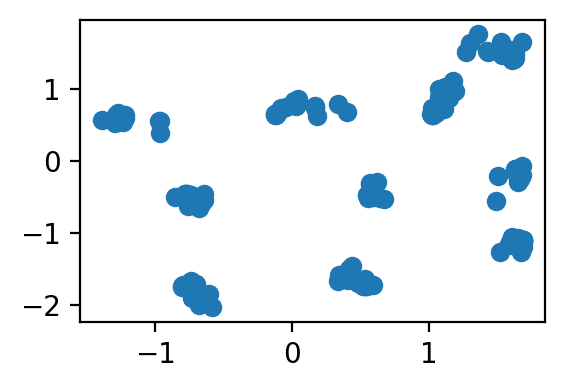

In [65]:
new_pos = normed_pos[-3,::5,:,:2].reshape((200,2))
plt.scatter(new_pos[:,0], new_pos[:,1])

In [66]:
normed_msd = msd/norm

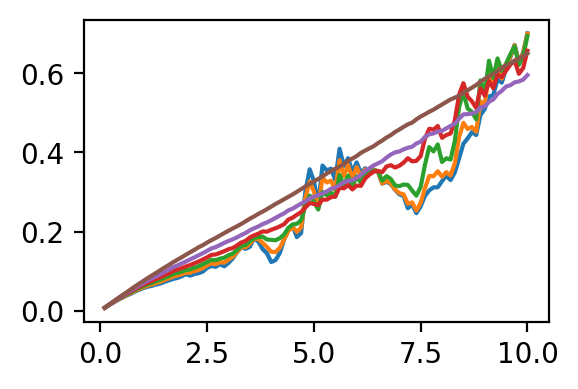

In [67]:
new_msd = normed_msd[-3]
for i in range(len(normed_msd)):
    plt.plot(time, normed_msd[i])

In [69]:
normed_q = np.zeros_like(q)
for i in range(q.shape[1]):
    normed_q[:,i] = q[:,i]/norm

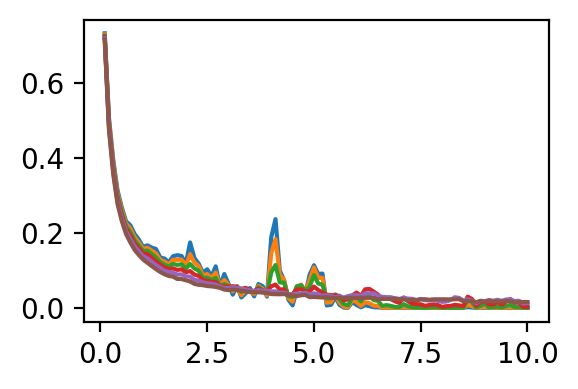

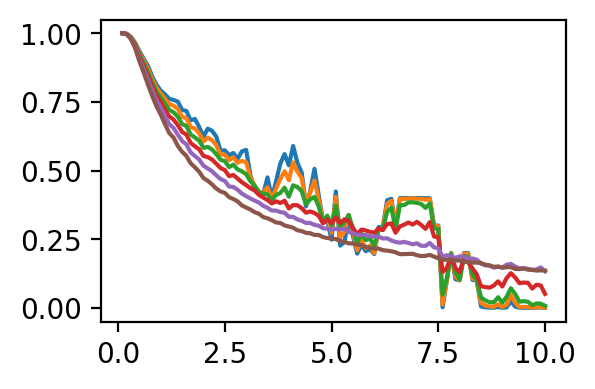

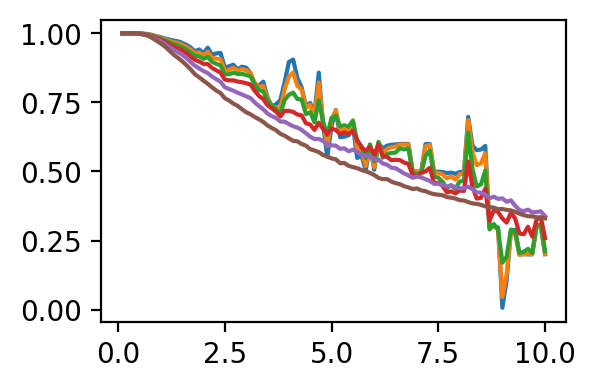

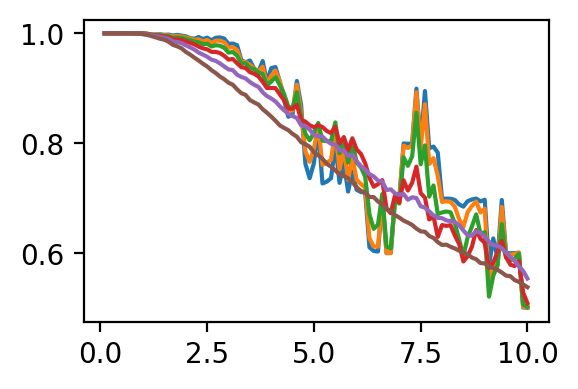

In [72]:
for i in range(normed_q.shape[1]):
    plt.figure()
    for j in range(normed_q.shape[0]):
        plt.plot(time, normed_q[j,i])

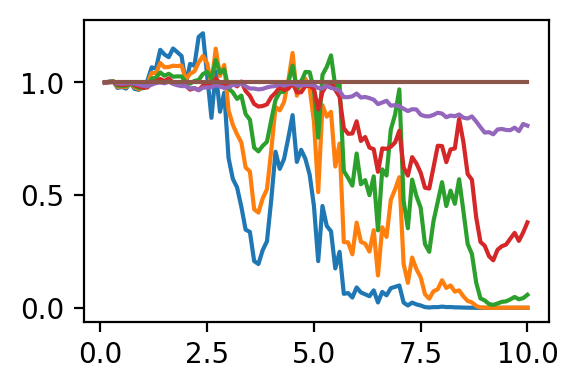

In [83]:
for i in range(len(norm)):
    plt.plot(time, norm[i]/real)